# Character Segmentation - Data Mining
Simple UI for creating data for character separation

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# Import Widgets
from ipywidgets import Button, HBox, VBox
import ipywidgets as widgets
from IPython.display import display, clear_output
# Timestamp
import time

# Import costume functions, corresponding to notebooks
from detect import page, words

## Hepl functions

In [2]:
SMALL_HEIGHT = 800
IMG = "text"

def implt(img, cmp=None, t=''):
    """ Show image using plt """
    plt.imshow(img, cmap=cmp)
    plt.title(t)
    plt.show()


def resize(img, height=SMALL_HEIGHT, allways=False):
    """ Resize image to given height """
    if (img.shape[0] > SMALL_HEIGHT or allways):
        rat = height / img.shape[0]
        return cv2.resize(img, (int(rat * img.shape[1]), height))
    
    return img


def ratio(img, height=SMALL_HEIGHT):
    return img.shape[0] / height

## Load image

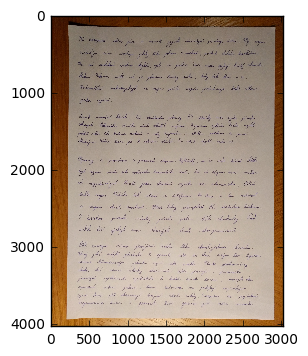

In [3]:
image = cv2.cvtColor(cv2.imread("data/pagedet/%s.jpg" % IMG), cv2.COLOR_BGR2RGB)
implt(image)

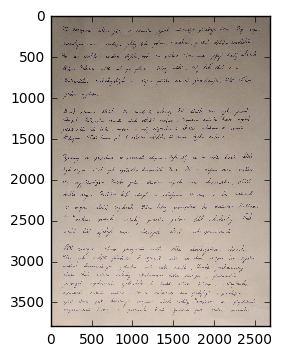

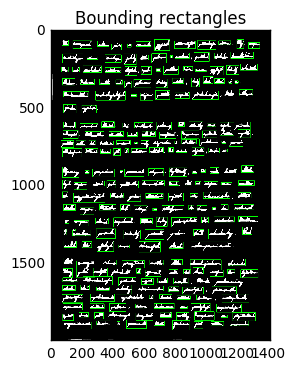

In [4]:
crop = page.detection(image)
implt(crop)
bBoxes = words.detection(crop)

## Simple UI using widgets

In [5]:
class Cycler:
    """ Cycle through boxes, save data """
    width = 30
    height = 60
    step = 2
    
    def __init__(self, image, boxes, idx):
        self.boxes = boxes       # Array of bounding boxes
        self.image = image       # Whole image
        self.index = idx         # Index of current bounding box
        self.pos = 0             # Position po slider
        self.actual = image      # Current image of word
        self.actualPos = image   # Current slider image
        self.nextImg()
        
    def saveLetter(self, b):
        self.save(b, val=0)
        
    def save(self, b, val=1):
        """ Saving current position of slider"""
        
        cv2.imwrite("data/gapdet/%s/%s.jpg" % (val, time.time()), cv2.cvtColor(self.actualPos, cv2.COLOR_BGR2RGB))
        self.nextPos(b)
        
    def prevPos(self, b):
        self.nextPos(b, step=-self.step)
        
    def nextSmallPos(self, b): 
        self.nextPos(b, step=1)
        
    def nextPos(self, b, step=0):
        """ Sliding over image """
        
        if step == 0:
            step = self.step
        
        if self.pos == -1:
            step = 1
        
        # Clearing jupyter output for new image
        clear_output()
        
        self.pos += step
        
        if self.pos < len(self.actual[0]) - self.width:            
            img = self.actual[0:self.height, self.pos:self.pos + self.width]
            self.actualPos = img
            
            # Drawing center vertical line for better visualizastion
            ii = np.copy(img)
            cv2.line(ii,((int)(self.width/2),0),((int)(self.width/2), self.height), (0,255,0), 1)
            implt(ii)
        else:
            if self.nextImg() == -1:
                print("END")

    def nextImg(self):
        """ Getting next image from the array """
        
        self.pos = -1
        if self.index < len(self.boxes):
            b = self.boxes[self.index]
            x1, y1, x2, y2 = b
            
            # Cuting out the word image and resizing to standard height
            img = self.image[y1:y2, x1:x2]
            img = resize(img, self.height, True)
            
            implt(img)            
            self.actual = img
            
            # Printing index for recovery
            print("Index: " + str(self.index))
            
            self.index += 1
            return 0
        else:
            print("END")
            return -1

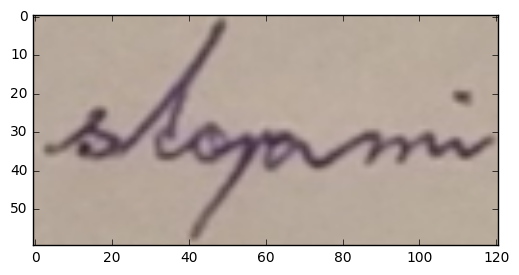

Index: 137


TraitError: The 'value' trait of an Image instance must be a bytes object, but a value of array([[[ 77,  35,  19],
        [ 69,  27,  11],
        [ 62,  20,   4],
        ..., 
        [ 79,  35,  10],
        [ 79,  34,  11],
        [ 88,  43,  20]],

       [[ 65,  23,   7],
        [ 62,  20,   4],
        [ 60,  18,   2],
        ..., 
        [ 81,  37,  12],
        [ 74,  29,   6],
        [ 72,  27,   4]],

       [[ 58,  16,   0],
        [ 56,  14,   0],
        [ 55,  13,   0],
        ..., 
        [ 73,  29,   4],
        [ 64,  19,   0],
        [ 58,  13,   0]],

       ..., 
       [[164,  90,  19],
        [162,  88,  17],
        [175, 101,  30],
        ..., 
        [141,  73,   8],
        [139,  71,   6],
        [139,  71,   6]],

       [[169,  95,  22],
        [165,  91,  18],
        [170,  96,  25],
        ..., 
        [137,  69,   4],
        [137,  70,   2],
        [138,  71,   3]],

       [[173,  99,  26],
        [169,  95,  22],
        [164,  90,  19],
        ..., 
        [136,  68,   3],
        [138,  71,   3],
        [140,  73,   5]]], dtype=uint8) <class 'numpy.ndarray'> was specified.

In [12]:
#  Last index
#  Last word: stopami
LAST_INDEX = 137
# Class cycling through text positions
cycler = Cycler(crop, bBoxes, LAST_INDEX)

def nextImg(b):
    clear_output()
    cycler.nextImg()
    

bGap = Button(description="Gap")
bLet = Button(description="Letter")
bNex = Button(description="Next / Start Lab.")
bNexS = Button(description="Next Small")
bPre = Button(description="Prev")
bNexi = Button(description="Next Image")
    
bGap.on_click(cycler.save)
bLet.on_click(cycler.saveLetter)
bPre.on_click(cycler.prevPos)
bNex.on_click(cycler.nextPos)
bNexS.on_click(cycler.nextSmallPos)
bNexi.on_click(nextImg)

# display(bGap, bLet, bNex, bNexS, bPre, bNexi)
ww = widgets.Image(
    value=image,
    width=300,
    height=400
)

HBox([VBox([bGap, bLet]), VBox([bNexS, bPre]), VBox([bNex, bNexi])])

In [ ]:
### RULES FOR CREATING DATASET ###
#
#  Label every image
#  Slider is moving by 2px
#  For each gap creat max. 3 images (before, center, after)
#
###################################

### Space for Notes ###
#
#  Try to tilt the sliding frame
#  Or when separated, tilt saparation lines +/- 45°,
#  so that it minimize the crossing pixels
#  (maximize number of white pixels in region...)
#  I'm able to create 300 data images / 30 min
#
#######################